In [1]:
###Laisser seulement les maisons et les appart

In [2]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as s

In [3]:
header_list = ["id_mutation",'date_mutation','numero_disposition','nature_mutation','valeur_fonciere','adresse_numero','adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','code_commune','nom_commune','code_departement','ancien_code_commune','ancien_nom_commune','id_parcelle','ancien_id_parcelle','numero_volume','lot1_numero','lot1_surface_carrez','lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','nombre_lots','code_type_local','type_local','surface_reelle_bati','nombre_pieces_principales','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale','surface_terrain','longitude','latitude','section_prefixe']

In [4]:
#On liste tous les fichiers csv qu'on a
csv_files = glob.glob('*.{}'.format('csv'))

In [5]:
df_concat = pd.concat([pd.read_csv(f,sep = ';' ,names=header_list) for f in csv_files ], ignore_index=True)


In [6]:
df_concat.drop(df_concat[df_concat['valeur_fonciere'] =='valeur_fonciere'].index, inplace = True)

In [7]:
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
5,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3003,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3004,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [8]:
df_concat['type_local']

1                                         Maison
2                                     Dépendance
3                                         Maison
4                                         Maison
5                                     Dépendance
                          ...                   
3001    Local industriel. commercial ou assimilé
3002                                 Appartement
3003    Local industriel. commercial ou assimilé
3004                                        None
3005    Local industriel. commercial ou assimilé
Name: type_local, Length: 2972, dtype: object

In [9]:
df_concat.drop(df_concat[df_concat['type_local'] =='Local industriel. commercial ou assimilé'].index, inplace = True)


In [10]:
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
5,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2019-1116721,2019-10-03,1,Vente,NaN,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,507.0,1.07078,49.38427,000BW
2997,2019-1116721,2019-10-03,1,Vente,NaN,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,74.0,1.076423,49.384774,000BW
2999,2019-1114809,2019-06-19,1,Vente,1.2,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,131.0,1.077196,49.385685,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW


In [11]:
df_concat.iloc[:]["type_local"]

1            Maison
2        Dépendance
3            Maison
4            Maison
5        Dépendance
           ...     
2996           None
2997           None
2999           None
3002    Appartement
3004           None
Name: type_local, Length: 2820, dtype: object

In [12]:
df_concat.drop(df_concat[df_concat['type_local'] =='Dépendance'].index, inplace = True)


In [13]:
df_concat["type_local"]=df_concat["type_local"].map({'Appartement': 1, "Maison": 2})

In [14]:
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
6,2020-1061542,2020-03-10,1,Vente,200000.0,2.0,None,RUE DU MADRILLET,1580,76800,...,18.0,1.0,S,sols,None,None,105.0,1.074902,49.403036,000AB
8,2019-1116084,2019-08-28,1,Vente,180000.0,28.0,None,RUE DELILLE,0582,76800,...,108.0,5.0,S,sols,None,None,348.0,1.071647,49.401956,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2019-1116721,2019-10-03,1,Vente,NaN,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,507.0,1.07078,49.38427,000BW
2997,2019-1116721,2019-10-03,1,Vente,NaN,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,74.0,1.076423,49.384774,000BW
2999,2019-1114809,2019-06-19,1,Vente,1.2,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,131.0,1.077196,49.385685,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW


In [15]:
List2 = ['latitude','longitude','adresse_numero','id_mutation','date_mutation','numero_disposition','nature_mutation','code_commune','nom_commune','code_departement','id_parcelle','nombre_lots','section_prefixe']
List = ['adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','ancien_code_commune','ancien_nom_commune','ancien_id_parcelle','numero_volume','lot1_surface_carrez','lot1_numero','lot2_numero','lot2_surface_carrez','lot3_surface_carrez','lot3_numero','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','code_type_local','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale']
List.append(List2)
for i in List:
    df_concat.drop(i, inplace=True, axis=1)

In [16]:
###supression None 


In [17]:
df_concat

,valeur_fonciere,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
1,260000.0,2.0,129.0,4.0,351.0
3,160000.0,2.0,64.0,4.0,452.0
4,174000.0,2.0,64.0,4.0,498.0
6,200000.0,1.0,18.0,1.0,105.0
8,180000.0,2.0,108.0,5.0,348.0
...,...,...,...,...,...
2996,NaN,NaN,NaN,NaN,507.0
2997,NaN,NaN,NaN,NaN,74.0
2999,1.2,NaN,NaN,NaN,131.0
3002,1000000.0,1.0,87.0,3.0,3973.0


In [18]:
df_concat=df_concat.dropna()
df_concat

,valeur_fonciere,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
1,260000.0,2.0,129.0,4.0,351.0
3,160000.0,2.0,64.0,4.0,452.0
4,174000.0,2.0,64.0,4.0,498.0
6,200000.0,1.0,18.0,1.0,105.0
8,180000.0,2.0,108.0,5.0,348.0
...,...,...,...,...,...
2981,145000.0,2.0,74.0,5.0,374.0
2982,262500.0,2.0,102.0,5.0,434.0
2983,130000.0,2.0,64.0,4.0,369.0
2984,189300.0,2.0,80.0,4.0,354.0


In [19]:
Q1 = pd.to_numeric(df_concat['surface_reelle_bati']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['surface_reelle_bati']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['surface_reelle_bati']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['surface_reelle_bati']) <= Q3 + 1.5*IQR)]

In [20]:
Q1 = pd.to_numeric(df_concat['surface_terrain']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['surface_terrain']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['surface_terrain']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['surface_terrain']) <= Q3 + 1.5*IQR)]

In [21]:
Q1 = pd.to_numeric(df_concat['valeur_fonciere']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['valeur_fonciere']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['valeur_fonciere']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['valeur_fonciere']) <= Q3 + 1.5*IQR)]

In [22]:
Q1 = pd.to_numeric(df_concat['nombre_pieces_principales']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['nombre_pieces_principales']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['nombre_pieces_principales']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['nombre_pieces_principales']) <= Q3 + 1.5*IQR)]

In [23]:
Q1 = pd.to_numeric(df_concat['type_local']).quantile(0.25)
Q3 = pd.to_numeric(df_concat['type_local']).quantile(0.75)
IQR = Q3 - Q1
df_concat = df_concat[(pd.to_numeric(df_concat['type_local']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat['type_local']) <= Q3 + 1.5*IQR)]

In [24]:
np.random.seed(0)
df_train, df_test = train_test_split(df_concat, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
###Norm
scaler = MinMaxScaler()
carac = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain','type_local']

df_train[carac] = scaler.fit_transform(df_train[carac])
df_test[carac] = scaler.fit_transform(df_test[carac])

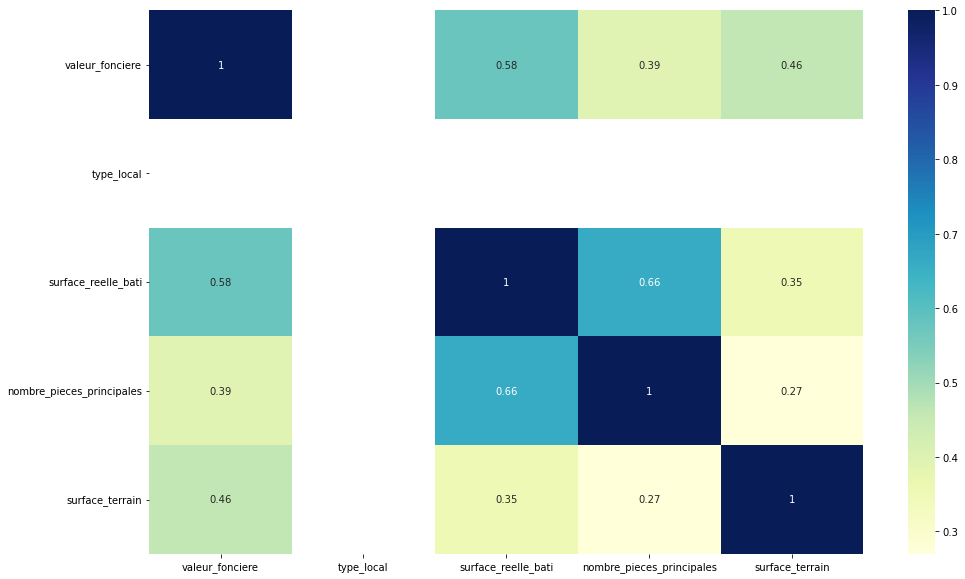

In [26]:
###Check the correlation between the caracteristiques
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
### diviser les données 
y_train = df_train.pop('valeur_fonciere')
X_train = df_train

In [28]:
y_test = df_test.pop('valeur_fonciere')
X_test = df_test

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lm.predict(X_test)

In [31]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.39799968968725974

In [32]:
y_test

1474    0.547579
1623    0.283806
364     0.510851
2048    0.560935
2464    0.582638
          ...   
1281    0.230384
1666    0.146077
427     0.410684
360     0.544240
701     0.644407
Name: valeur_fonciere, Length: 294, dtype: float64

In [33]:
y_pred

array([0.5124477 , 0.36936355, 0.47143251, 0.55335626, 0.53587322,
       0.55065334, 0.54107933, 0.30301604, 0.36674278, 0.61751442,
       0.55141959, 0.66764235, 0.40749376, 0.49546188, 0.48754879,
       0.60354535, 0.75432593, 0.34272769, 0.48129722, 0.36163177,
       0.50274598, 0.2964391 , 0.4898061 , 0.48827902, 0.36801786,
       0.45788257, 0.54152426, 0.3003532 , 0.66239616, 0.55012078,
       0.64745572, 0.46031921, 0.44948173, 0.62823639, 0.48573169,
       0.47382907, 0.45891717, 0.46380944, 0.70024175, 0.61806599,
       0.40694219, 0.3777766 , 0.54272117, 0.52441621, 0.47276393,
       0.75005858, 0.39917307, 0.40140251, 0.57669075, 0.33959817,
       0.47143251, 0.71279717, 0.45874325, 0.46970304, 0.50477235,
       0.63167228, 0.47917375, 0.48984411, 0.46184629, 0.46511506,
       0.63161792, 0.63307232, 0.53174719, 0.48087742, 0.27528716,
       0.51566892, 0.46235779, 0.35634825, 0.46024859, 0.53162015,
       0.45944974, 0.62551987, 0.56136378, 0.47561083, 0.60535